In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


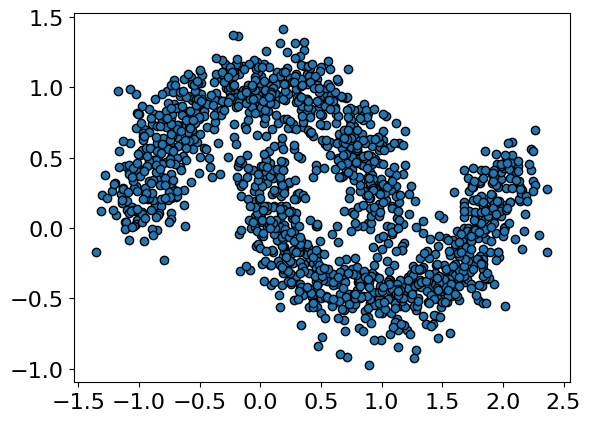

In [2]:
X, y = make_moons(n_samples=1500, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.scatter(X[:, 0], X[:, 1],  edgecolors='k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

In [3]:
# 切分資料：70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print("訓練集大小:", X_train.shape)
print("測試集大小:", X_test.shape)

訓練集大小: (1050, 2)
測試集大小: (450, 2)


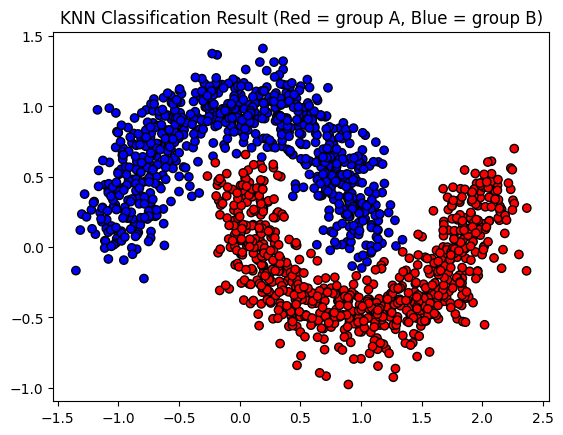

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# 1. 建立 KNN 模型 (k=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# 2. 訓練模型
knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X)

# 畫分類結果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.bwr, edgecolors='k')
plt.title("KNN Classification Result (Red = group A, Blue = group B)")
plt.show()


Random Forest Test Accuracy: 0.9933333333333333


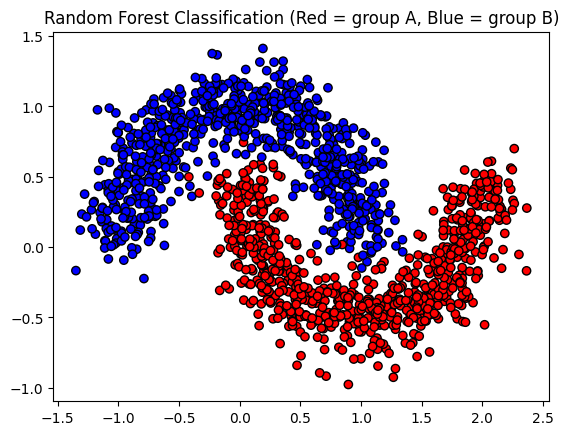

In [5]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=100)

random_forest_classifier.fit(X_train, y_train)

### Test Acc Section
y_pred = random_forest_classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", acc)
###

y_pred_rf = random_forest_classifier.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred_rf, cmap=plt.cm.bwr, edgecolors='k')
plt.title("Random Forest Classification (Red = group A, Blue = group B)")
plt.show()


Epoch [100/200], Loss: 0.0230
Epoch [200/200], Loss: 0.0198
MLP Test Accuracy: 0.9933333396911621


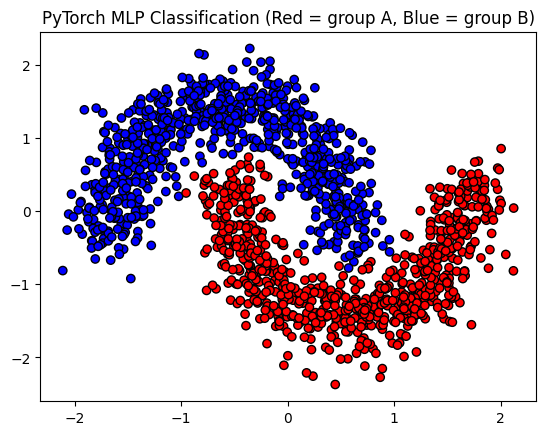

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(2, 64),   # 輸入2維 -> 20神經元
            nn.ReLU(),
            nn.Linear(64, 32),  # 隱藏層
            nn.ReLU(),
            nn.Linear(32, 2)    # 輸出2類
        )
    def forward(self, x):
        return self.layers(x)

mlp_model = MLP()

# loss 和 optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_model.parameters(), lr=0.01)

epochs = 200
losses = []
for epoch in range(epochs):
    outputs = mlp_model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Accuracy
with torch.no_grad():
    y_pred = mlp_model(X_test).argmax(dim=1)
    acc = (y_pred == y_test).float().mean()
    print("MLP Test Accuracy:", acc.item())

# Final Result
with torch.no_grad():
    y_all_pred = mlp_model(torch.tensor(X, dtype=torch.float32)).argmax(dim=1)

plt.scatter(X[:, 0], X[:, 1], c=y_all_pred, cmap=plt.cm.bwr, edgecolors='k')
plt.title("PyTorch MLP Classification (Red = group A, Blue = group B)")
plt.show()

